In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -r /content/drive/MyDrive/Task1_Image-Classifer/requirements.txt

PyTorch is a popular open-source machine learning framework used for building deep learning models, while CIFAR-10 is a dataset of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is often used as a benchmark for image classification tasks.

<small> &diams; Note: The code and documentation are designed to be accessible and understandable to people who are new to machine learning and deep learning. It may be a good option for people who are just starting out with PyTorch and want to learn how to build an image classifier. </small>

<img alt="A photo of a man on an elephant with an ML-generated overlay showing objects in the frame" src="https://upload.wikimedia.org/wikipedia/commons/5/54/DenseCap_%28Johnson_et_al.%2C_2016%29.png" width=800px/> 
<caption>Figure shows the problem of dense captioning, where a computer detects objects in images and describes them in natural language.</caption>



##### # Image Source: <cite><a href="https://cs.stanford.edu/people/karpathy/densecap/">Densecap: Fully convolutional localization networks for dense captioning</a> by Johnson, Justin, Andrej Karpathy, and Li Fei-Fei. Proceedings of the IEEE conference on computer vision and pattern recognition 2016.</cite>

<hr>

If we want to build a ML model that can identify objects in images, we can create an image classifier using a deep neural network (DNN). This involves training the network on a large dataset of labeled images, which enables it to recognize patterns and features that correspond to different objects.

For our particular task, we're interested in building an image classifier that can identify 10 different types of objects, including planes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. To do this, we'll start by downloading an appropriate dataset that includes examples of each object type.

Once we have our dataset, we'll use a tool like PyTorch to train our neural network, tuning its parameters and architecture until it's able to accurately classify the objects in the images. Finally, we'll evaluate the performance of our model to see how well it's able to generalize to new, unseen images.

## Step 1: Download a dataset and preview images

The accuracy and effectiveness of a machine learning model is heavily dependent on the quality and quantity of data it is trained on. In order to build an accurate image classifier, we need a large dataset of high-quality images that are representative of the types of objects we want our model to recognize.

For this project, we will be using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which contains 60,000 labeled images in 10 different classes. This dataset is commonly used as a benchmark for image classification tasks and is widely recognized as a high-quality dataset for training machine learning models.

To get started, we can download the CIFAR-10 dataset using the `torchvision` library and preview a few sample images to get an idea of what the data looks like. 

Files already downloaded and verified
Files already downloaded and verified


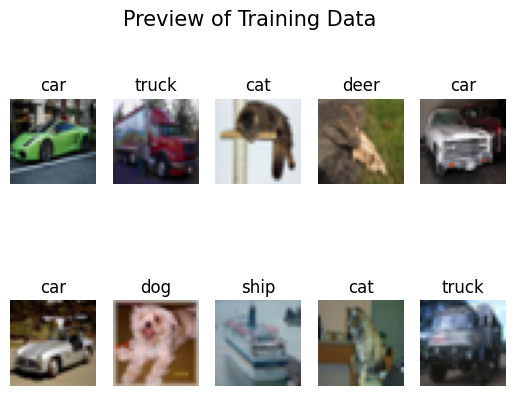

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Set batch size and apply transformation
batch_size = 10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download the CIFAR-10 dataset to ./data
print("Downloading Training Data...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
print("Downloading Testing Data...")
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define classes for image recognition
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Get a batch of images and labels from training data
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Plot images and their labels
for i in range(batch_size):
    # Add new subplot
    plt.subplot(2, int(batch_size/2), i + 1)
    # Plot the image
    img = images[i]
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    # Add the image's label
    plt.title(classes[labels[i]])

plt.suptitle('Preview of Training Data', size=15)
plt.show()

We begin by downloading the CIFAR-10 dataset, which contains 60,000 images of various objects. The dataset is divided into a training set and a testing set. We use the `torchvision` library to download and prepare the data. The data is transformed by scaling the pixel values and normalizing them to a range of -1 to 1.

We then define a `batch_size` of 10 and create `DataLoader` objects for both the training and testing sets. These objects help us iterate over the data in batches during the training process.

To get a better understanding of the data we're working with, we use `matplotlib` to create a visualization of a handful of images from the training set. We extract a batch of images using the `iter()` method and then loop through each image, adding it to a new subplot in our plot. We also add the corresponding label to each subplot to help us identify the object in the image.

Finally, we use `plt.show()` to display the plot of our training data preview.

# Step 2: Configure the neural network

Having obtained our dataset, the next step is to configure a neural network for `PyTorch`. The neural network will be responsible for converting an image into a corresponding description.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))    # Apply convolution and pooling layers
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)       # Flatten the tensor before passing it to the fully connected layers
        x = F.relu(self.fc1(x))       # Apply activation function to the output of each fully connected layer
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the neural network        
net = Net()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print("The neural network has been defined and is ready for training.!")

The neural network has been defined and is ready for training.!


# Step 3: Train the network and save model

PyTorch trains our network by adjusting its parameters and evaluating its performance against our labelled dataset.

In [ ]:
from tqdm import tqdm

EPOCHS = 5
print("Training...")
for epoch in range(EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(tqdm(trainloader, desc=f"Epoch {epoch + 1} of {EPOCHS}", leave=True, ncols=80)):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Save our trained model
PATH = '/content/drive/MyDrive/Task1_Image-Classifer/cifar_net.pth'
torch.save(net.state_dict(), PATH)

Training...


Epoch 5 of 5: 100%|█████████████████████████| 5000/5000 [01:00<00:00, 82.35it/s]


# Step 4: Test the trained model

It's time to evaluate our model!

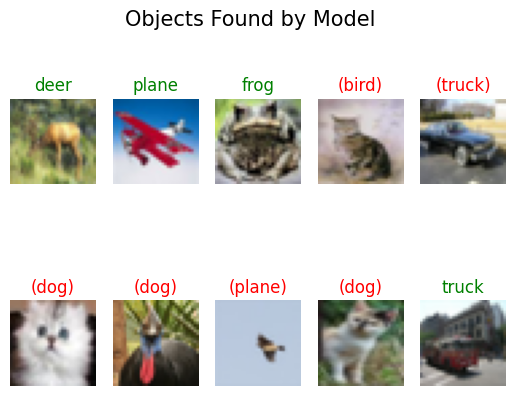

In [ ]:
# Pick random photos from training set
if dataiter == None:
    dataiter = iter(testloader)
images, labels = dataiter.next()

# Load our model
net = Net()
net.load_state_dict(torch.load(PATH))

# Analyze images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Show results
for i in range(batch_size):
    # Add new subplot
    plt.subplot(2, int(batch_size/2), i + 1)
    # Plot the image
    img = images[i]
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    # Add the image's label
    color = "green"
    label = classes[predicted[i]]
    if classes[labels[i]] != classes[predicted[i]]:
        color = "red"
        label = "(" + label + ")"
    plt.title(label, color=color)

plt.suptitle('Objects Found by Model', size=15)
plt.show()

# Step 5: Evaluate model accuracy

To conclude, we will evaluate the overall performance of our model.

In [ ]:
# Record the number of correct predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

#Use the trained network to make predictions on the test dataset
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # Track the number of correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# Print accuracy statistics for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.4 %
Accuracy for class: car   is 65.9 %
Accuracy for class: bird  is 43.2 %
Accuracy for class: cat   is 51.0 %
Accuracy for class: deer  is 49.2 %
Accuracy for class: dog   is 37.8 %
Accuracy for class: frog  is 75.6 %
Accuracy for class: horse is 66.3 %
Accuracy for class: ship  is 81.9 %
Accuracy for class: truck is 68.6 %
